# Analytical (not data driven) example of the asymptotic equivalence of the density estimation problem and Gaussian white noise model

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.stats import reciprocal
from scipy.stats import truncnorm
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import time

In [2]:
def mt_png_examples_path():
    return './images'

## Reciprocal probability density function

Let $f = \frac{1}{x [\log b - \log a]}, \; a < b, \; a,b \in \mathbb{R}_{>0}$ be the reciprocal (or log-uniform) probability density function. Following the Steps in the proof of Section 3 we are aiming to make all nontrivial details intiutively clear using reciprocal distribution as an example.

First, we recall the definition of $\mathcal{P}_{1,n}$ model: $\mathcal{P}_{1,n}$ is the experiment associated with the following density estimation problem: $(Y_i)_{1 \le i \le n}$ iid random variables with common density function $f$ concentrated on $[0,1]$ and beloning to $\mathcal{F}_{(\gamma, K, \epsilon, M)}$. The corresponding statistical model is
$$
  \mathcal{P}_{1,n}=\left( [0,1]^n, \mathcal{B}([0,1]^n), \left\{ \mathbb{P}^{\otimes n}_f: f \in \mathcal{F}_{(\gamma, K, \epsilon, M)} \right\} \right), \label{P1_def}
$$
  where
$$
  \mathcal{F}_{(\gamma, K, \epsilon, M)} = \left\{ f \in C^1(I): \epsilon \le f(x) \le M, |f'(x)-f'(y)| \le K |x-y|^{\gamma} , \forall x,y \in [0,1]\right\}, \label{F_class_def}
$$
  for some $\gamma \in (0,1]$ and $K,\epsilon, M \in \mathbb{R}_{>0}$.

Thus, we suppose, that the true density function $f$ is given as reciprocal probability density function. In particular,
$$f \in \mathcal{F}_{\left(1, \frac{1}{[\log b - \log a]}, \frac{1}{b [\log b - \log a]}, \frac{1}{a [\log b - \log a]}\right)}. \tag{1}$$

Choosing $a = 1$ and $b = 10$ and scaling the domain to the interval $[0,1]$, we consider the following density function:

In [3]:
def get_scaled_compact_pdf(pdf_func, f_supp_min, f_supp_max):
    scale_factor = f_supp_max - f_supp_min
    def scaled_pdf(x):
        if isinstance(x, (float, int)):
            return pdf_func(x * scale_factor + f_supp_min)
        else:
            return pdf_func(np.array(x) * scale_factor + f_supp_min)
    return scaled_pdf, scale_factor


def plot_scaled_pdf_func(scaled_pdf_func, pdf_name, n=1000, pdf_params_dict=None, out_path=None):
    text_size = 16
    plt.style.use('seaborn-muted')
    rcParams['font.family'] = 'serif'
    rcParams['mathtext.fontset'] = 'dejavuserif'
    x_grid = np.linspace(0, 1, n)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
    ax.plot([0, 0], [0, scaled_pdf_func(0)], color='indigo', ls='--', lw=0.8)
    ax.plot([1, 1], [0, scaled_pdf_func(1)], color='indigo', ls='--', lw=0.8)
    ax.plot(x_grid, scaled_pdf_func(x_grid), color='indigo')
    ax.tick_params(axis='both', which='major', labelsize=text_size)
    title_str = 'Scaled {} PDF\n'.format(pdf_name)
    if pdf_params_dict is not None:
        title_str += ' ' + ', '.join(['{}={}'.format(k, v) for k, v in pdf_params_dict.items()])
    ax.set_title(title_str, fontsize=text_size)
    ax.set_ylim([0.0, None])
    ax.set_xlabel('$x$', fontsize=text_size)
    ax.set_ylabel('$f(x)$', fontsize=text_size)
    plt.tight_layout()
    if out_path is not None:
        plt.savefig(os.path.join(out_path, '{}_pdf_plot.png'.format(time.strftime('%Y%M%d_%H%M%S'))),
                    quality=100, dpi=500)
    plt.show()

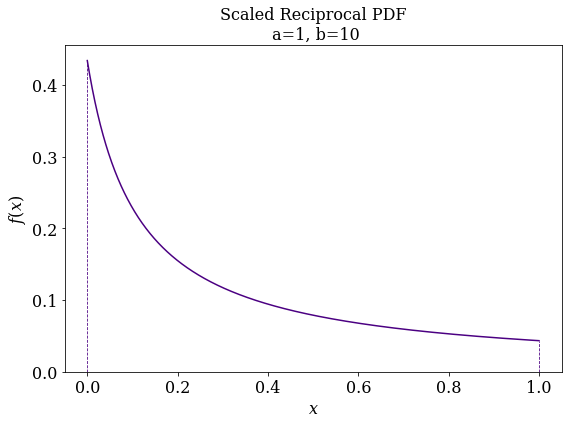

In [4]:
a = 1
b = 10
pdf_func = reciprocal(a, b).pdf
pdf_name = 'Reciprocal'
pdf_params_dict = {'a': a, 'b': b}
scaled_pdf_func, scale_factor = get_scaled_compact_pdf(pdf_func, f_supp_min=a, f_supp_max=b)

plot_scaled_pdf_func(scaled_pdf_func, pdf_name=pdf_name, pdf_params_dict=pdf_params_dict,
                     out_path=mt_png_examples_path())

### Step 1: $\Delta\left(\mathcal{P}_{1,n},\mathcal{P}_m\right) = \mathcal{O}\left(\sqrt{n} (m^{-3/2}+m^{-1\gamma-1})\right)$
In Step 1 we have proven that the cost needed to pass from the model $\mathcal{P}_{1,n}$ to a corresponding multinomial approximation  $\mathcal{M}(n;(\theta_1,...,\theta_m))$ is of order $\sqrt{n}(m^{-3/2} + m^{-1-\gamma})$. We recall the definition of the the experiment associated with multinomial distribution:
$$\mathcal{P}_m = \left( \{ 0,...,n \}^m, \sigma(\{ 0, ..., n \}^m), \left\{ \mathcal{M}(n, \theta_1, ..., \theta_m): \theta_i=\int_{J_i} f(x) dx, \; i \in \{ 1,...,m \}, \; f \in \mathcal{F}_{(\gamma, K, \epsilon, M)} \right\} \right).$$

<ul>
<li>$\delta \left( \mathcal{P}_{1,n}, \mathcal{P}_m \right)=0$ was directly and easily proven after introducing the map defined as
$$S(x_1,...,x_n)=(|\{j: x_j \in J_1\}|, ..., |\{j: x_j \in J_m\}|) \;\;\; \forall x_1, ..., x_n \in [0,1].$$</li>
<li>The proof of $\delta \left( \mathcal{P}_m, \mathcal{P}_{1,n} \right)=\mathcal{O}\left(\sqrt{n} (m^{-3/2}+m^{-1\gamma-1})\right)$ was nontrivial. To make the given arguments intuitively more clear, we are going to construct the asymptotically equivalent probability density function of the model $\mathcal{P}_{1,n}$ constructed from $\mathcal{P}_m$.</li>
</ul>

In particular, suppressing the the exact definitions of the models from the Section 3, we have shown that $\Delta(\mathcal{P}_m,\mathcal{P}^*)=0$, $\delta(\mathcal{P}^*,\hat{\mathcal{P}}_m)=0$ and $\Delta(\hat{\mathcal{P}}_m,\mathcal{P}_{1,n}) \xrightarrow[n \rightarrow \infty]{} 0$. Despite more intuitively clear first two quantities, the last one is nontrivial. Let us consider the quantity $\Delta(\hat{\mathcal{P}}_m,\mathcal{P}_{1,n})$ in detail.

As in the proof, considering $n$ realisations of $X^*$ we want to construct an approximation of $\mathbb{P}^{\otimes n}_f$, the law of samples of the model $\mathcal{P}_{1,n}$. For that we define the following linear interpolation: $$\hat{f}_m(x)=\sum^m_{i=1} V_i(x)\theta_i \;\;\; \forall x \in [0,1],$$
where
$$V_i(x) = \begin{cases} m\mathbb{I}_{[0,x^*_1]}(x)+t_m(x-x^*_1)\mathbb{I}_{(x^*_1,x^*_2]}(x), & i=1, \\ t_m(x-x^*_i)\mathbb{I}_{[x^*_{i-1},x^*_{i+1}]}(x), & i \in \{2,...,m-1\}, \\ t_m(x-x^*_m)\mathbb{I}_{[x^*_{m-1},x^*_m)}(x)+m\mathbb{I}_{[x^*_m,1]}(x), & i=m, \end{cases}$$ with $t_m(a)=m-m^2|a|$.

In [5]:
def get_unit_interval_unif_partition(m):
    return np.array([[i / m, (i + 1) / m] for i in range(m)])


def get_partition_midpoints(m):
    return np.around(np.mean(get_unit_interval_unif_partition(m), axis=1), 5)


def pdf_integ(pdf_func, lower_bound, upper_bound, scale_factor=1):
    # scale_factor: see get_scaled_compact_pdf()
    return integrate.quad(pdf_func, lower_bound, upper_bound)[0] * scale_factor


def get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=1):
    partition = get_unit_interval_unif_partition(m)
    thetas = []
    for p in partition:
        thetas.append(round(pdf_integ(pdf_func=scaled_pdf_func, lower_bound=p[0], upper_bound=p[1],
                                      scale_factor=scale_factor),
                            5))
    return np.array(thetas)

In [6]:
def t(x, m):
    return m - m ** 2 * np.abs(x)


def v(x, i, m):
    # for i = 0, ..., m - 1
    midpoints = get_partition_midpoints(m)
    if i == 0:
        return m * (0 <= x <= midpoints[0]) + t(x - midpoints[i], m) * (midpoints[0] < x <= midpoints[1])
    elif 0 < i < m - 1:
        return t(x - midpoints[i], m) * (midpoints[i - 1] <= x <= midpoints[i + 1])
    elif i == m - 1:
        return t(x - midpoints[m - 1], m) * (midpoints[m - 2] <= x < midpoints[m - 1]) + \
                    m * (midpoints[m - 1] <= x <= 1)


def f_est(x, scaled_pdf_func, m, scale_factor=1):
    thetas = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=scale_factor)
    if isinstance(x, (float, int)):
        f = 0
        for i in range(m):
            f += v(x, i, m) * thetas[i]
        return f
    else:
        f_values = []
        for x_i in x:
            f = 0
            for i in range(m):
                f += v(x_i, i, m) * thetas[i]
            f_values.append(f)
        return np.array(f_values)

In [7]:
def plot_pdf_linear_approx_from_multinom(scaled_pdf_func, pdf_name, m, n=1000, out_path=None):
    text_size = 16
    plt.style.use('seaborn-muted')
    rcParams['font.family'] = 'serif'
    rcParams['mathtext.fontset'] = 'dejavuserif'
    x_grid = np.linspace(0, 1, n)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
    thetas = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=1)
    for i in range(m):
        if i == 0:
            label = '$V_i(x)\\theta_i, \; i=1,...,m$'
        else:
            label = None
        ax.plot(x_grid, [v(x, i, m) * thetas[i] for x in x_grid], c='gray', lw=0.5, label=label)
    ax.plot(x_grid, scaled_pdf_func(x_grid), color='indigo', label='True PDF $f(x)$')
    ax.plot(x_grid, f_est(x_grid, scaled_pdf_func, m, scale_factor=1),
            color='orange', label='$\^f_m(x)$ for $m=${}'.format(m))
    ax.tick_params(axis='both', which='major', labelsize=text_size)
    ax.set_ylim([0.0, None])
    ax.set_xlabel('$x$', fontsize=text_size)
    ax.set_title('Linear approximation of {} PDF'.format(pdf_name), fontsize=text_size)
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0,2]
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
              fontsize=text_size, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    if out_path is not None:
        plt.savefig(os.path.join(out_path,
                                 '{}_pdf_approx_from_multinom_m{}.png'.format(time.strftime('%Y%M%d_%H%M%S'), m)),
                    quality=100, dpi=500)
    plt.show()

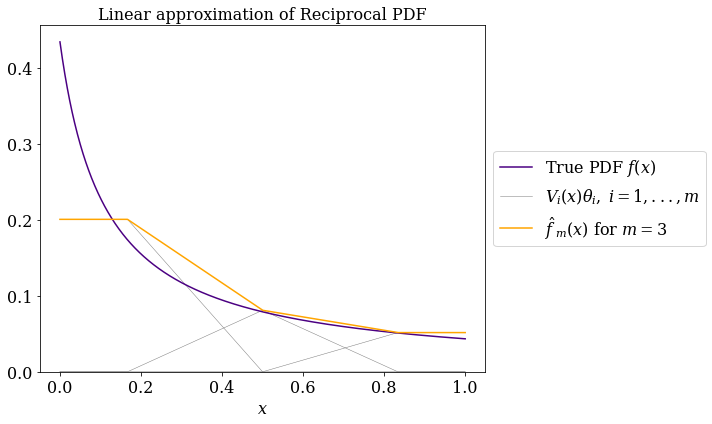

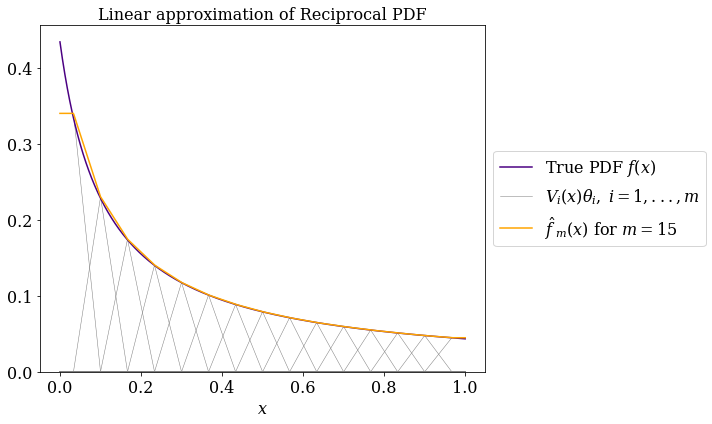

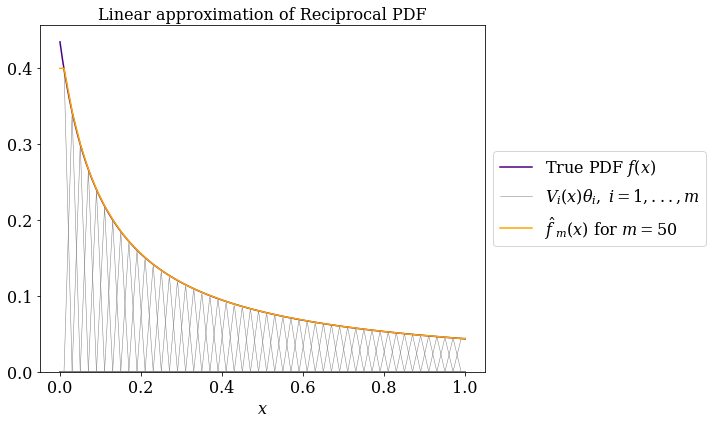

In [8]:
plot_pdf_linear_approx_from_multinom(scaled_pdf_func, pdf_name, m=3, out_path=mt_png_examples_path())
plot_pdf_linear_approx_from_multinom(scaled_pdf_func, pdf_name, m=15, out_path=mt_png_examples_path())
plot_pdf_linear_approx_from_multinom(scaled_pdf_func, pdf_name, m=50, out_path=mt_png_examples_path())

### Step 2: $\Delta\left( \mathcal{P}_m, \mathcal{N}_m \right) = \mathcal{O}\left(\frac{m \ln{m}}{\sqrt{n}}\right)$
We have done a further step obtaining a Gaussian approximation (with independent coordinates) starting from the multinomial one. In particular, we have considered the statistical model associated with $m$ independent Gaussian random variables:
$$\mathcal{N}_m=\left(\mathbb{R}^m,\mathcal{B}(\mathbb{R}^m), \left\{ \bigotimes_{j=1}^{m} \mathcal{N}\left( \sqrt{\frac{\theta_i}{m}}, \frac{1}{4nm} \right), \; \theta_i=\int_{J_i} f(x) dx, \; f \in \mathcal{F}_{(\gamma, K, \epsilon, M)}\right\}\right).$$

We are aiming to show the asymptotic equivalence of the models $\mathcal{P}_m$ and $\mathcal{N}_m$. To this end we construct the estimations of $\theta$ (probabilities vector) for this experiments. Again, as was done in the Section 3, we choose $m = n^{\frac{1}{2 + \gamma}}$. Having $\gamma$ equal 1, we will always make simulations based on $m = \sqrt{n}$.

We denote by $\mathcal{P}_m(i)$ and $\mathcal{N}_m(i)$ the $i^{\text{th}}$ element of the corresponding experiment.

In [9]:
def make_multinom_simulation(n, m, thetas, random_seed=None):
    assert(m == len(thetas))
    if not (random_seed is None):
        np.random.seed(random_seed)
    return np.random.multinomial(n=n, pvals=thetas)


def make_indep_gaussians_simulation(n, m, thetas, random_seed=None):
    assert(m == len(thetas))
    if not (random_seed is None):
        np.random.seed(random_seed)
    simulation = []
    for i in range(m):
        mean = np.sqrt(thetas[i] / m)
        var = 1 / (4 * n * m)
        simulation.append(np.random.normal(loc=mean, scale=np.sqrt(var)))
    return np.array(simulation)

In [10]:
print('='*50)
print('Simulation samples from multinomial experiment')
print('-'*50)
for n in [15, 100, 250]:
    m = int(np.sqrt(n))
    thetas = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=scale_factor)
    multinom_simulation = make_multinom_simulation(n, m, thetas)
    print('Simulation for n = {:>3d} (m = {:>2d}): |'.format(n, m), end='')
    [print('{:>3d} |'.format(s), end='') for s in multinom_simulation]
    print('\n')


print('='*50)
print('Simulation samples from independent Gaussians experiment')
print('-'*50)
for n in [15, 100, 250]:
    m = int(np.sqrt(n))
    thetas = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=scale_factor)
    indep_gaussians_simulation = make_indep_gaussians_simulation(n, m, thetas)
    print('Simulation for n = {:>3d} (m = {:>2d}): |'.format(n, m), end='')
    [print('{:>5.3f} |'.format(s), end='') for s in indep_gaussians_simulation]
    print('\n')

Simulation samples from multinomial experiment
--------------------------------------------------
Simulation for n =  15 (m =  3): |  7 |  4 |  4 |

Simulation for n = 100 (m = 10): | 17 |  8 | 18 | 12 |  7 | 10 |  7 |  4 |  8 |  9 |

Simulation for n = 250 (m = 15): | 60 | 42 | 24 | 17 | 22 | 10 | 18 |  7 |  8 |  7 |  8 |  5 |  8 |  9 |  5 |

Simulation samples from independent Gaussians experiment
--------------------------------------------------
Simulation for n =  15 (m =  3): |0.390 |0.320 |0.263 |

Simulation for n = 100 (m = 10): |0.155 |0.134 |0.112 |0.124 |0.095 |0.066 |0.095 |0.059 |0.073 |0.046 |

Simulation for n = 250 (m = 15): |0.118 |0.096 |0.075 |0.073 |0.062 |0.058 |0.070 |0.053 |0.055 |0.058 |0.064 |0.049 |0.035 |0.040 |0.036 |



MLE of $\theta$ (probabilities vector) for multinomial model is given by
$$\hat{\theta}_i(\mathcal{P}_m)=\frac{\mathcal{P}_m(i)}{\sum^m_{j=1}{\mathcal{P}_m(j)}}.$$

In [11]:
def multinom_thetas_mle(multinom_simulation):
    return multinom_simulation / np.sum(multinom_simulation)

As a next step we consider the MLE of $\theta$ using samples from $\mathcal{N}_m$:
$$\hat{\theta}_i(\mathcal{N}_m)=m \cdot \left(\mathcal{N}_m(i)\right)^2.$$

In [12]:
def indep_gaussians_thetas_mle(indep_gaussians_simulation):
    return len(indep_gaussians_simulation) * (indep_gaussians_simulation ** 2)

Now, we want to compare the convergence of $\hat{\theta}_i(\mathcal{P}_m)$ and $\hat{\theta}_i(\mathcal{N}_m)$.

In [13]:
for n in [15, 100, 250]:
    m = int(np.sqrt(n))
    thetas = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=scale_factor)
    print('='*50)
    print('True thetas for n = {:>3d} (m = {:>2d}):\n\t('.format(n, m), end='')
    [print('{:>6.3f} '.format(t), end='') for t in thetas]
    print(')\n')
    print('-'*50)
    print('MLE of thetas for multinomial experiment:\n\t(', end='')
    multinom_simulation = make_multinom_simulation(n, m, thetas)
    [print('{:>6.3f} '.format(t), end='') for t in multinom_thetas_mle(multinom_simulation)]
    print(')\n')
    print('-'*50)
    print('MLE of thetas for independent Gaussians experiment:\n\t(', end='')
    indep_gaussians_simulation = make_indep_gaussians_simulation(n, m, thetas)
    [print('{:>6.3f} '.format(t), end='') for t in indep_gaussians_thetas_mle(indep_gaussians_simulation)]
    print(')\n')
    print('\n')

True thetas for n =  15 (m =  3):
	( 0.602  0.243  0.155 )

--------------------------------------------------
MLE of thetas for multinomial experiment:
	( 0.667  0.267  0.067 )

--------------------------------------------------
MLE of thetas for independent Gaussians experiment:
	( 0.774  0.153  0.162 )



True thetas for n = 100 (m = 10):
	( 0.279  0.168  0.121  0.095  0.078  0.066  0.057  0.050  0.045  0.041 )

--------------------------------------------------
MLE of thetas for multinomial experiment:
	( 0.230  0.140  0.120  0.170  0.030  0.040  0.080  0.090  0.040  0.060 )

--------------------------------------------------
MLE of thetas for independent Gaussians experiment:
	( 0.237  0.167  0.062  0.132  0.084  0.032  0.075  0.040  0.046  0.065 )



True thetas for n = 250 (m = 15):
	( 0.204  0.138  0.105  0.084  0.071  0.061  0.053  0.047  0.043  0.039  0.036  0.033  0.031  0.029  0.027 )

--------------------------------------------------
MLE of thetas for multinomial experime

We also visualize the $\mathcal{l}^2$ loss over the vector of estimated probabilities for different $n$'s.

In [14]:
def l2_loss(vec1, vec2):
    assert(len(vec1) == len(vec2))
    return sum([(v[0] - v[1]) ** 2 for v in zip(vec1, vec2)]) ** 0.5


def make_comparison_pdf_thetas_mle(scaled_pdf_func, n_grid, random_seed=None, scale_factor=1):
    if not (random_seed is None):
        np.random.seed(random_seed)
    estimation_losses = []
    for n in n_grid:
        if n is None:
            estimation_losses.append(dict(n = None, multinom_loss = None, indep_gaussians_loss = None))
            continue
        m = int(np.sqrt(n))
        thetas = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=scale_factor)
        # multinomial model
        multinom_simulation = make_multinom_simulation(n, m, thetas)
        multinom_estimation = multinom_thetas_mle(multinom_simulation)
        multinom_loss = l2_loss(multinom_estimation, thetas)
        # independent Gaussians model
        indep_gaussians_simulation = make_indep_gaussians_simulation(n, m, thetas)
        indep_gaussians_estimation = indep_gaussians_thetas_mle(indep_gaussians_simulation)
        indep_gaussians_loss = l2_loss(indep_gaussians_estimation, thetas)
        
        estimation_losses.append(dict(n = n,
                                      multinom_loss = multinom_loss,
                                      indep_gaussians_loss = indep_gaussians_loss))
    return estimation_losses

In [15]:
def visualize_pdf_thetas_mle_convergence(estimation_losses, out_path=None):
    text_size = 16
    plt.style.use('seaborn-muted')
    rcParams['font.family'] = 'serif'
    plt.style.use('seaborn-muted')
    inds = list(range(len(estimation_losses)))
    plt.figure(figsize=(12,6))
    plt.plot(inds, [est['multinom_loss'] for est in estimation_losses],
             label='Multinomial model, $\mathcal{P}_m$',
             color='lightgray', alpha=0.7, marker='o', markeredgecolor='black', markersize=8)
    plt.plot(inds, [est['indep_gaussians_loss'] for est in estimation_losses],
             label='Independent Gaussians model, $\mathcal{N}_m$',
                color='lightgray', alpha=0.7, marker='x', markeredgecolor='black', markersize=8)
    plt.legend(fontsize=text_size)
    plt.ylabel('$\mathscr{l}^2$ loss', fontsize=text_size)
    plt.xlabel('$n$', fontsize=text_size)
    s_list = []
    for s in [est['n'] for est in estimation_losses]:
        if s is None:
            s_list.append('...')
        else:
            s_list.append(s)
    plt.xticks(inds, s_list, rotation=45, fontsize=text_size)
    plt.tick_params(axis='both', which='major', labelsize=text_size)
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    if not (out_path is None):
        plt.savefig(os.path.join(out_path, '{}_equivalence_thetas_est'.format(time.strftime('%Y%M%d_%H%M%S'))),
                    quality=100, dpi=500)
    plt.show()

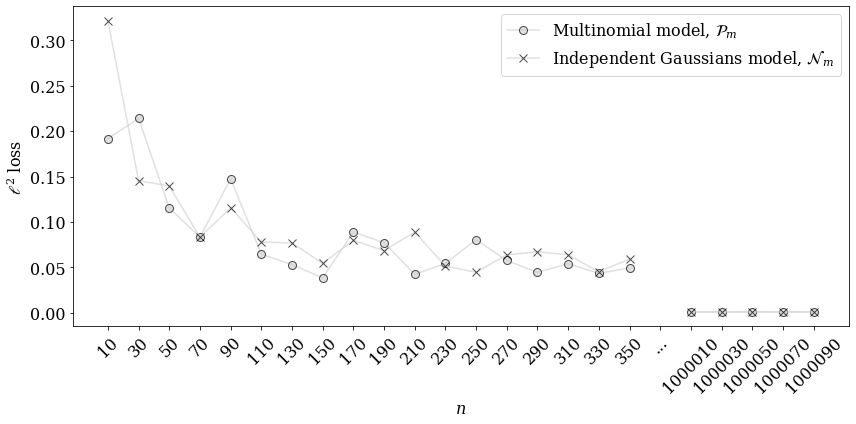

In [16]:
n_grid = list(range(10, 370, 20)) + [None] + list(range(1000010, 1000100, 20))
estimation_losses = make_comparison_pdf_thetas_mle(scaled_pdf_func, n_grid, random_seed=1234567,
                                                   scale_factor=scale_factor)
visualize_pdf_thetas_mle_convergence(estimation_losses, out_path=mt_png_examples_path())

### Step 3: $\Delta\left( \mathcal{N}_m, \mathcal{N}^*_m \right) = \mathcal{O}\left(\sqrt{n}\left(m^{-\gamma-1}+m^{-\frac{3}{2}}\right)\right)$

Denote by $\mathcal{N}^*_m$ the statistical model associated with the observation of the increments of $\left(y_t\right)_t$ over the intervals $J_i, \; i = 1, . . . ,m$, i.e.
$$\mathcal{N}^*_m = \left( \mathbb{R}^m, \mathcal{B}(\mathbb{R}^m), \left\{ \bigotimes_{i=1}^{m} \mathcal{N}\left( \int_{J_i} \sqrt{f(s)} ds, \frac{1}{4nm} \right), \; f \in \mathcal{F}_{(\gamma, K, \epsilon, M)} \right\}\right).$$

We directly show the asymptotic equivalence of the density functions. It is clear, that it is enough to show the equality of the limits for
$$\Bigg(\sqrt{\frac{\int_{J_i} f(x) dx}{m}}\Bigg)_{m \in \mathbb{N}} \;\;\; \text{and} \;\;\; \left(\int_{J_i} \sqrt{f(s)} ds\right)_{m \in \mathbb{N}} \;\;\; \forall i = 1,...,m.$$

We denote by $\mathcal{N}_m(i)$ and $\mathcal{N}^*_m(i)$ the $i^{\text{th}}$ element of the corresponding experiment.

In [17]:
def get_sqrt_pdf_func(pdf_func):
    def sqrt_pdf_func(x):
        return np.sqrt(pdf_func(x))
    return sqrt_pdf_func

In [18]:
sqrt_pdf_func = get_sqrt_pdf_func(pdf_func)
scaled_sqrt_pdf_func = get_sqrt_pdf_func(scaled_pdf_func)

In [19]:
for m in [3, 50]:
    thetas_pdf = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=scale_factor)
    thetas_sqrt_pdf = get_thetas_vector_scaled_pdf(scaled_sqrt_pdf_func, m, scale_factor=scale_factor)
    print('='*50)
    print('Thue means values m = {:>3d}:'.format(m))
    print('-'*50)
    means_vector1 = []
    means_vector2 = []
    skip_trigger = 0
    for i in range(m):
        if 3 < i < m - 1:
            if not skip_trigger:
                print('...')
                print('-'*50)
                skip_trigger = 1
            continue
        mean1 = np.sqrt(thetas_pdf[i] / m)
        print('\tMean for N_m  ({:>3d}): {:.4f}'.format(i + 1, mean1))
        means_vector1.append(mean1)
        mean2 = thetas_sqrt_pdf[i]
        print('\tMean for N*_m ({:>3d}): {:.4f}'.format(i + 1, mean2))
        means_vector2.append(mean2)
        print('> Absolute difference: {:>2.6f}'.format(np.abs(mean1 - mean2)))
        print('-'*50)
    print('l2 loss over means vector: {:>2.6f}'.format(l2_loss(means_vector1, means_vector2)))
    print('\n')

Thue means values m =   3:
--------------------------------------------------
	Mean for N_m  (  1): 0.4480
	Mean for N*_m (  1): 1.3180
> Absolute difference: 0.870039
--------------------------------------------------
	Mean for N_m  (  2): 0.2846
	Mean for N*_m (  2): 0.8511
> Absolute difference: 0.566482
--------------------------------------------------
	Mean for N_m  (  3): 0.2272
	Mean for N*_m (  3): 0.6808
> Absolute difference: 0.453560
--------------------------------------------------
l2 loss over means vector: 1.132955


Thue means values m =  50:
--------------------------------------------------
	Mean for N_m  (  1): 0.0379
	Mean for N*_m (  1): 0.1137
> Absolute difference: 0.075804
--------------------------------------------------
	Mean for N_m  (  2): 0.0351
	Mean for N*_m (  2): 0.1053
> Absolute difference: 0.070213
--------------------------------------------------
	Mean for N_m  (  3): 0.0329
	Mean for N*_m (  3): 0.0986
> Absolute difference: 0.065703
-----------

In [20]:
def make_comparison_means(scaled_pdf_func, scaled_sqrt_pdf_func, m_grid, random_seed=None, scale_factor=1):
    means_diff = []
    if not (random_seed is None):
        np.random.seed(random_seed)
    for m in m_grid:
        if m is None:
            means_diff.append(dict(m = None, l2_loss = None))
            continue
        thetas_pdf = get_thetas_vector_scaled_pdf(scaled_pdf_func, m, scale_factor=scale_factor)
        thetas_sqrt_pdf = get_thetas_vector_scaled_pdf(scaled_sqrt_pdf_func, m, scale_factor=scale_factor)
        means_vector1 = []
        means_vector2 = []
        for i in range(m):
            # means for N_m
            mean1 = np.sqrt(thetas_pdf[i] / m)
            means_vector1.append(mean1)
            # means for N*_m
            mean2 = thetas_sqrt_pdf[i]
            means_vector2.append(mean2)
        
        means_diff.append(dict(m = m, l2_loss = l2_loss(means_vector1, means_vector2)))
    return means_diff

In [21]:
def visualize_means_difference(means_diff, out_path=None):
    text_size = 16
    plt.style.use('seaborn-muted')
    rcParams['font.family'] = 'serif'
    plt.style.use('seaborn-muted')
    inds = list(range(len(means_diff)))
    plt.figure(figsize=(8,6))
    plt.plot(inds, [diff['l2_loss'] for diff in means_diff],
             color='lightgray', markeredgecolor='darkred', marker='s', markersize=8)
    plt.ylabel('$\mathscr{l}^2$ loss over means vector', fontsize=text_size)
    plt.xlabel('$m$', fontsize=text_size)
    m_list = []
    for m in [diff['m'] for diff in means_diff]:
        if m is None:
            m_list.append('...')
        else:
            m_list.append(m)
    plt.xticks(inds, m_list, rotation=45, fontsize=text_size)
    plt.tick_params(axis='both', which='major', labelsize=text_size)
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    if not (out_path is None):
        plt.savefig(os.path.join(out_path, '{}_equivalence_means'.format(time.strftime('%Y%M%d_%H%M%S'))),
                    quality=100, dpi=500)
    plt.show()

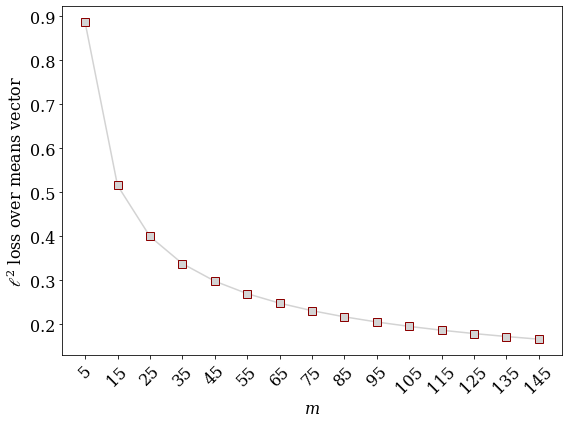

In [22]:
m_grid = list(range(5, 155, 10))
means_diff = make_comparison_means(scaled_pdf_func, scaled_sqrt_pdf_func, m_grid, random_seed=87654321,
                                   scale_factor=scale_factor)
visualize_means_difference(means_diff, out_path=mt_png_examples_path())

### Step 4: $\Delta\left(\mathcal{N}^*_m, \mathcal{P}_{2,n}\right)=\mathcal{O}\left(\sqrt{n}\left(m^{-\gamma-1}+m^{-\frac{3}{2}}\right)\right)$

$\mathcal{P}_{2,n}$ is the experiment that corresponds to the continuous observation of a trajectory of a Gaussian with noise model
$$Y_t=\int^t_0 \sqrt{f(y)}dy + \int^t_0 \frac{1}{2\sqrt{n}} dW_t, \; t \in [0,1].$$
Denoting by $P_{Y, f}$ the law of $Y=\left(Y_t\right)_{t \in [0,1]}$, the statistical model we consider is
$$\mathcal{P}_{2, n}=\left(C[0,1], \sigma(C[0,1]), \left\{ P_{Y, f}: f \in \mathcal{F}_{(\gamma, K, \epsilon, M)} \right\} \right).$$

Since $\mathcal{N}^*_m$ is the model associated with the observation of the increments $\left(\bar{Y}_i\right)_{1\le i \le m}$ of $\left(y_t\right)_t$ defined as in (4), it is clear, that $\delta(\mathcal{P}_{2,n}, \mathcal{N}^*_m)=0$. It remains to show $\delta(\mathcal{N}^*_m, \mathcal{P}_{2,n})=\mathcal{O}\left(\sqrt{n}\left(m^{-\gamma-1}+m^{-\frac{3}{2}}\right)\right)$.

To this end we construct from $\mathcal{N}^*_m$ a stochastic process
$$Y^*_t = \int^t_0 \widehat{\sqrt{f_m}}(y)dy + \int^t_0 \frac{1}{2\sqrt{n}} dW^*_t, \;\;\; t \in [0,1],$$
where $\left(W^*_t\right)$ is a standard Brownian motion and
$$\widehat{\sqrt{f_m}} = \sum^m_{i = 1} \left( \int_{J_i} \sqrt{f(y)}dy \right) V_i(y).$$

Thus
$$Y^*_t = \sum^m_{i=1}\left(\int_{J_i} \sqrt{f(y)}dy\right) \int^t_0 V_i(y)dy + \int^t_0 \frac{1}{2\sqrt{n}} dW^*_t.$$

To show the equivalence between the stochastic processes, we investigate the convergence of the series
$$\left(\int^t_0 \widehat{\sqrt{f_m}}(y)dy\right)_{m \in \mathbb{N}} \xrightarrow[m \rightarrow \infty]{} \int^t_0 \sqrt{f(y)}dy.$$

In [23]:
def split_intelval_to_negative_positive(a, b):
    assert(a <= b)
    if a < 0:
        if b < 0:
            return [[a, b], [0, 0]]
        else:
            return [[a, 0], [0, b]]
    else:
        return [[0, 0], [a, b]]


def t_integ(i, m, lower_bound, upper_bound):
    midpoint = get_partition_midpoints(m)[i]
    lower_bound = lower_bound - midpoint
    upper_bound = upper_bound - midpoint
    neg_part, pos_part = split_intelval_to_negative_positive(lower_bound, upper_bound)
    result = ((upper_bound - lower_bound) * m) - (m ** 2 * \
                (((pos_part[1] ** 2  - pos_part[0] ** 2) / 2) + \
                     ((np.abs(neg_part[0]) ** 2)  - np.abs(neg_part[1]) ** 2) / 2))
    return round(result, 5)


def get_intervals_intersection(a1, b1, a2, b2):
    assert(a1 <= b1 and a2 <= b2)
    if a1 <= a2 and b1 <= b2:
        if b1 < a2:
            return None
        a_inters = min(a2, b1)
        b_inters = max(a2, b1)
    elif a1 > a2 and b1 > b2:
        if b2 < a1:
            return None
        a_inters = min(a1, b2)
        b_inters = max(a1, b2)
    else:
        a_inters = max(a1, a2)
        b_inters = min(b1, b2)
    if a_inters <= b_inters:
        return [a_inters, b_inters]
    else:
        return None


def v_integ(i, m, lower_bound, upper_bound):
    # for i = 0, ..., m - 1
    midpoints = get_partition_midpoints(m)
    result = 0
    if i == 0:
        inters1 = get_intervals_intersection(0, midpoints[0], lower_bound, upper_bound)
        if inters1 is not None:
            result += m * (inters1[1] - inters1[0])
        inters2 = get_intervals_intersection(midpoints[0], midpoints[1], lower_bound, upper_bound)
        if inters2 is not None:
            result += t_integ(i, m, inters2[0], inters2[1])
    elif 0 < i < m - 1:
        inters1 = get_intervals_intersection(midpoints[i - 1], midpoints[i + 1], lower_bound, upper_bound)
        if inters1 is not None:
            result += t_integ(i, m, inters1[0], inters1[1])
    elif i == m - 1:
        result = 0
        inters1 = get_intervals_intersection(midpoints[m - 1], 1, lower_bound, upper_bound)
        if inters1 is not None:
            result += m * (inters1[1] - inters1[0])
        inters2 = get_intervals_intersection(midpoints[m - 2], midpoints[m - 1], lower_bound, upper_bound)
        if inters2 is not None:
            result += t_integ(i, m, inters2[0], inters2[1])
    return result


def sqrt_f_est_integ(t, scaled_sqrt_pdf_func, m, scale_factor=1):
    thetas = get_thetas_vector_scaled_pdf(scaled_sqrt_pdf_func, m, scale_factor=scale_factor)
    if isinstance(t, (float, int)):
        f = 0
        for i in range(m):
            f += v_integ(i, m, 0, t) * thetas[i]
        return f
    else:
        f_values = []
        for t_i in t:
            f = 0
            for i in range(m):
                f += v_integ(i, m, 0, t_i) * thetas[i]
            f_values.append(f)
        return np.array(f_values)

In [32]:
def plot_sqrt_cdf_approx(scaled_sqrt_pdf_func, pdf_name, m, scale_factor=1, n=100, out_path=None):
    text_size = 16
    plt.style.use('seaborn-muted')
    rcParams['font.family'] = 'serif'
    rcParams['mathtext.fontset'] = 'dejavuserif'
    t_grid = np.linspace(0, 1, n)
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    thetas = get_thetas_vector_scaled_pdf(scaled_sqrt_pdf_func, m, scale_factor)
    for i in range(m):
        if i == 0:
            label = '$( \int_{J_i} \sqrt{f(y)}dy ) \cdot \int^t_0 V_i(y)dy, \; i=1,...,m$'
        else:
            label = None
        ax.plot(t_grid, [v_integ(i, m, 0, t) * thetas[i] for t in t_grid], c='gray', lw=0.5, label=label)
    ax.plot(t_grid, [pdf_integ(scaled_sqrt_pdf_func, 0, t, scale_factor) for t in t_grid],
            color='indigo', label='True Squared CDF $\int^t_0 \sqrt{f(y)}dy$')
    ax.plot(t_grid, sqrt_f_est_integ(t_grid, scaled_sqrt_pdf_func, m, scale_factor),
            color='orange', label='$\int^t_0 \^\sqrt{f_m}(y)dy$' + ' for $m=${}'.format(m))
    ax.tick_params(axis='both', which='major', labelsize=text_size)
    ax.set_ylim([0.0, None])
    ax.set_xlabel('$t$', fontsize=text_size)
    ax.set_title('Approximation of Squared {} CDF'.format(pdf_name), fontsize=text_size)
    handles, labels = plt.gca().get_legend_handles_labels()
    order = [1,0,2]
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order],
              fontsize=text_size, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    if out_path is not None:
        plt.savefig(os.path.join(out_path,
                                 '{}_sqrt_cdf_approx_m{}.png'.format(time.strftime('%Y%M%d_%H%M%S'), m)),
                    quality=100, dpi=500)
    plt.show()

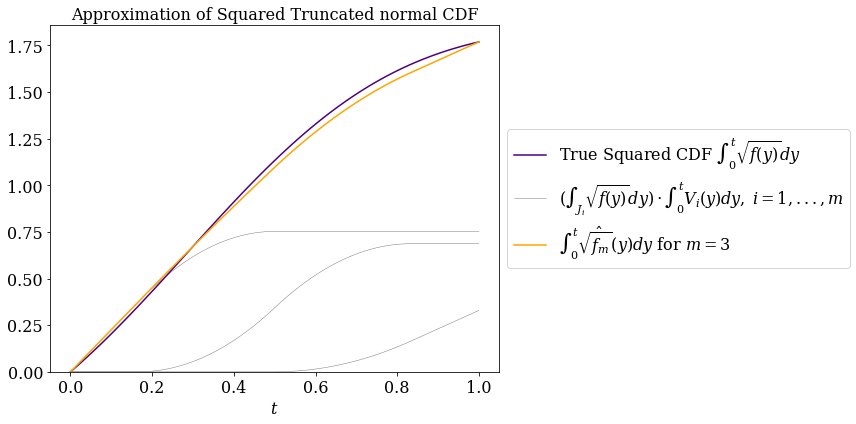

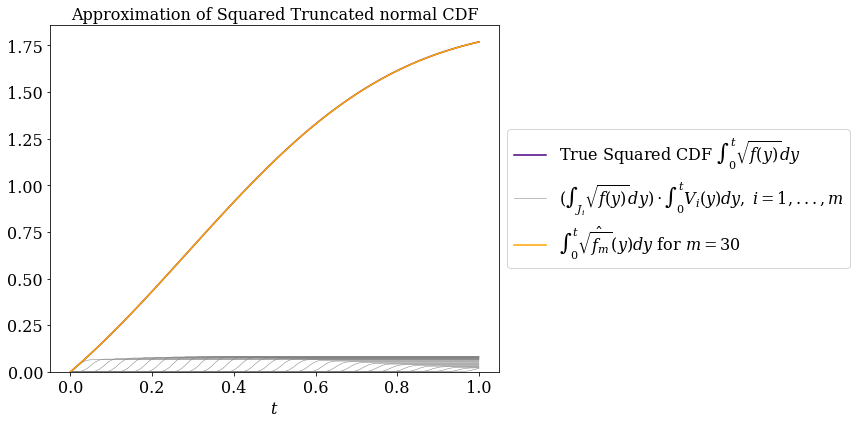

In [33]:
plot_sqrt_cdf_approx(scaled_sqrt_pdf_func, pdf_name, m=3, scale_factor=scale_factor,
                     out_path=mt_png_examples_path())
plot_sqrt_cdf_approx(scaled_sqrt_pdf_func, pdf_name, m=30, scale_factor=scale_factor,
                     out_path=mt_png_examples_path())

---

## Truncated normal probability density function

We show the same analytical results for the Truncated normal distribution.

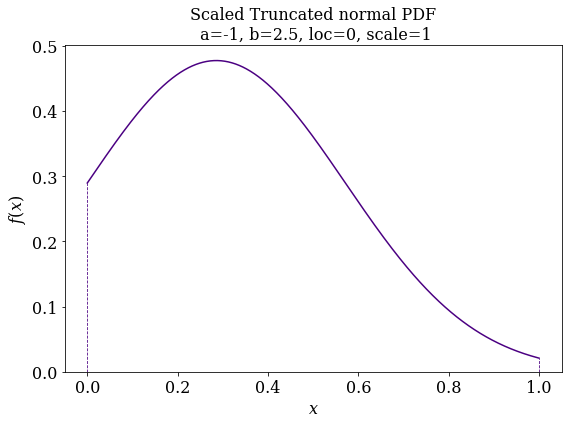

In [26]:
a = -1
b = 2.5
loc = 0
scale = 1
pdf_func = truncnorm(a, b, loc=0, scale=1).pdf
pdf_name = 'Truncated normal'
pdf_params_dict = {'a': a, 'b': b, 'loc': loc, 'scale': scale}
scaled_pdf_func, scale_factor = get_scaled_compact_pdf(pdf_func, f_supp_min=a, f_supp_max=b)

plot_scaled_pdf_func(scaled_pdf_func, pdf_name=pdf_name, pdf_params_dict=pdf_params_dict,
                     out_path=mt_png_examples_path())

### Step1: $\Delta\left(\mathcal{P}_{1,n},\mathcal{P}_m\right) = \mathcal{O}\left(\sqrt{n} (m^{-3/2}+m^{-1\gamma-1})\right)$.

As in the example of the experiment assotiated with reciptrocal distribution, we only show asymptotic property of the nontrivial quantity $\Delta(\hat{\mathcal{P}}_m,\mathcal{P}_{1,n}) = \mathcal{O}\left(\sqrt{n} (m^{-3/2}+m^{-1\gamma-1})\right)$.

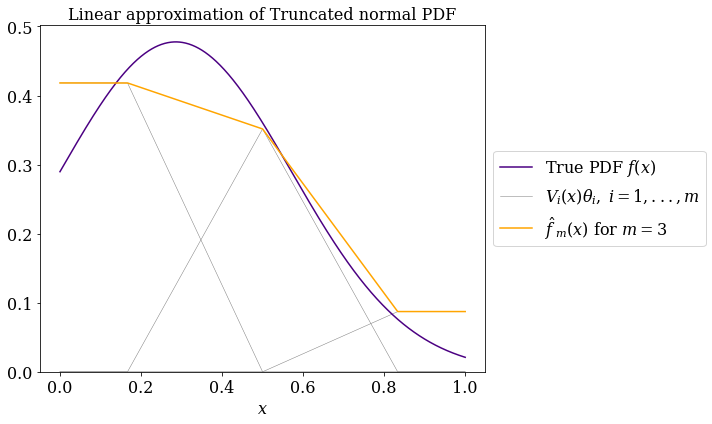

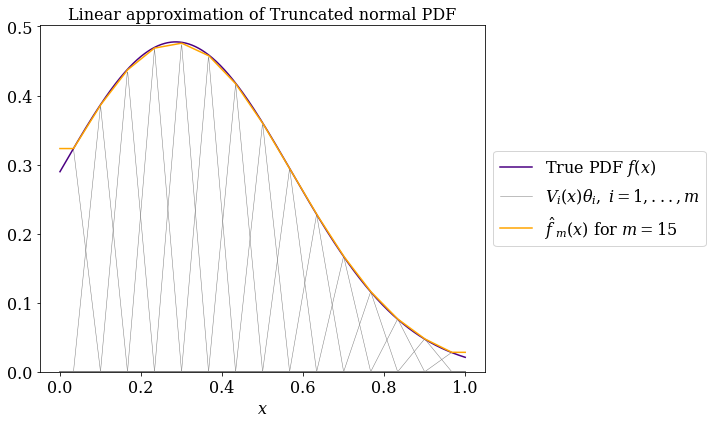

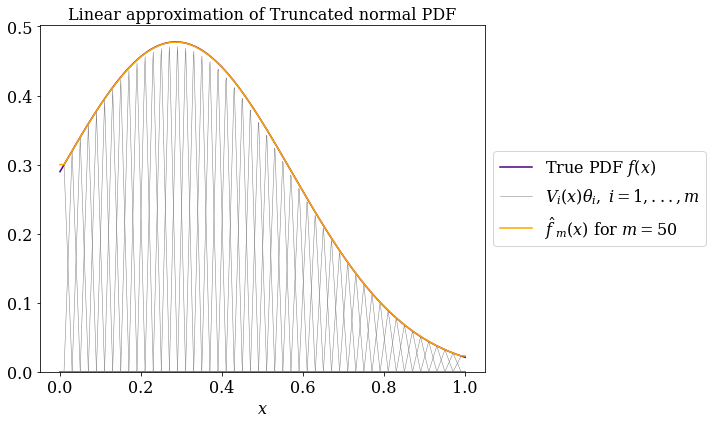

In [27]:
plot_pdf_linear_approx_from_multinom(scaled_pdf_func, pdf_name, m=3, out_path=mt_png_examples_path())
plot_pdf_linear_approx_from_multinom(scaled_pdf_func, pdf_name, m=15, out_path=mt_png_examples_path())
plot_pdf_linear_approx_from_multinom(scaled_pdf_func, pdf_name, m=50, out_path=mt_png_examples_path())

### Step 2: $\Delta\left( \mathcal{P}_m, \mathcal{N}_m \right) = \mathcal{O}\left(\frac{m \ln{m}}{\sqrt{n}}\right)$

We are aiming to show the asymptitic equivalence of the estimations of $\theta$ (probabilities vector) for this experiments.

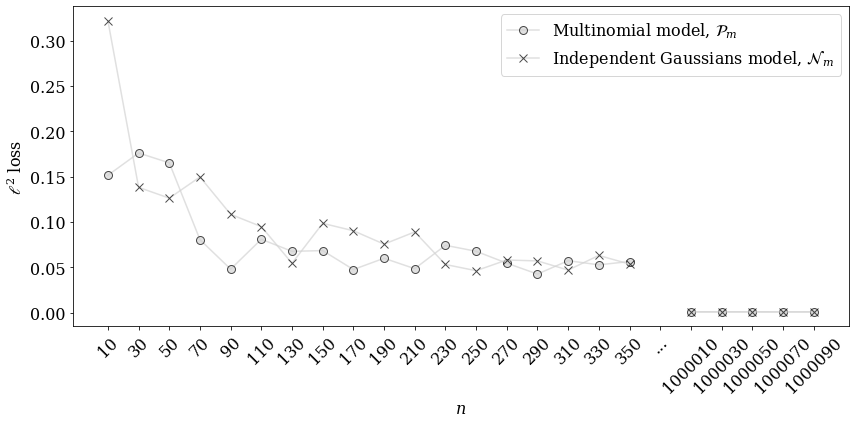

In [28]:
n_grid = list(range(10, 370, 20)) + [None] + list(range(1000010, 1000100, 20))
estimation_losses = make_comparison_pdf_thetas_mle(scaled_pdf_func, n_grid, random_seed=54667,
                                                   scale_factor=scale_factor)
visualize_pdf_thetas_mle_convergence(estimation_losses, out_path=mt_png_examples_path())

### Step 3: $\Delta\left( \mathcal{N}_m, \mathcal{N}^*_m \right) = \mathcal{O}\left(\sqrt{n}\left(m^{-\gamma-1}+m^{-\frac{3}{2}}\right)\right)$

We are showing the equality between the limits of the means
$$\Bigg(\sqrt{\frac{\int_{J_i} f(x) dx}{m}}\Bigg)_{m \in \mathbb{N}} \;\;\; \text{and} \;\;\; \left(\int_{J_i} \sqrt{f(s)} ds\right)_{m \in \mathbb{N}} \;\;\; \forall i = 1,...,m.$$

In [29]:
sqrt_pdf_func = get_sqrt_pdf_func(pdf_func)
scaled_sqrt_pdf_func = get_sqrt_pdf_func(scaled_pdf_func)

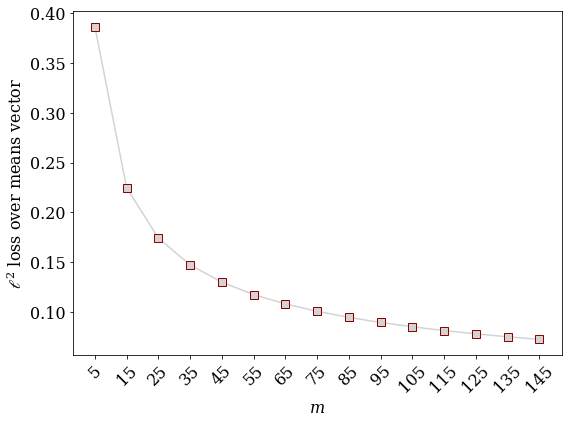

In [30]:
m_grid = list(range(5, 155, 10))
means_diff = make_comparison_means(scaled_pdf_func, scaled_sqrt_pdf_func, m_grid, random_seed=987651,
                                   scale_factor=scale_factor)
visualize_means_difference(means_diff, out_path=mt_png_examples_path())

### Step 4: $\Delta\left(\mathcal{N}^*_m, \mathcal{P}_{2,n}\right)=\mathcal{O}\left(\sqrt{n}\left(m^{-\gamma-1}+m^{-\frac{3}{2}}\right)\right)$

To show the equivalence between the stochastic processes, we investigate the convergence of the series
$$\left(\int^t_0 \widehat{\sqrt{f_m}}(y)dy\right)_{m \in \mathbb{N}} \xrightarrow[m \rightarrow \infty]{} \int^t_0 \sqrt{f(y)}dy.$$

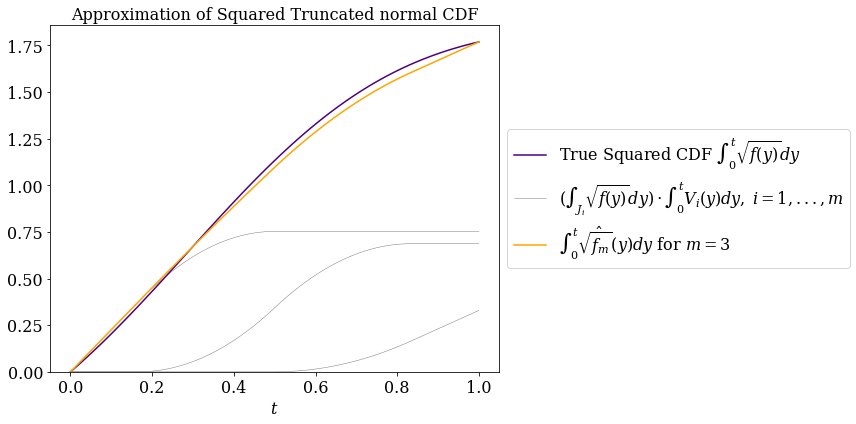

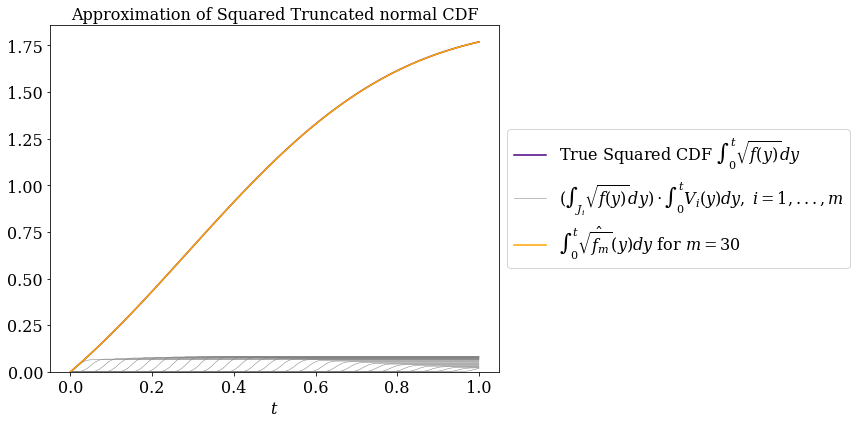

In [34]:
plot_sqrt_cdf_approx(scaled_sqrt_pdf_func, pdf_name, m=3, scale_factor=scale_factor,
                     out_path=mt_png_examples_path())
plot_sqrt_cdf_approx(scaled_sqrt_pdf_func, pdf_name, m=30, scale_factor=scale_factor,
                     out_path=mt_png_examples_path())